Source: https://techcommunity.microsoft.com/t5/azure-high-performance-computing/exploring-cpu-vs-gpu-speed-in-ai-training-a-demonstration-with/ba-p/4014242

In [ ]:
#Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#checking available devices
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#Checking cuda support for TF
tf.test.is_built_with_cuda()

True

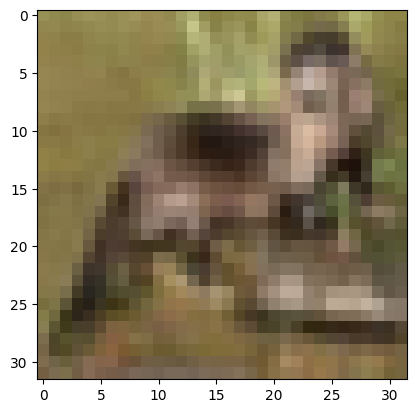

In [ ]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Checking dataset shape and visualizing images
train_images.shape, test_images.shape
# Lets visualize one sample image
plt.imshow(train_images[100])

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [ ]:
# Creating the deep learning model
def getmodel():

    # Define the model
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))  # Flatten the input images
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

    # Compile the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
# CPU
with tf.device('/CPU:0'):
    cmodel = getmodel()
    cmodel.fit(train_images, train_labels, epochs = 100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.0484 - loss: 4.3146
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1340 - loss: 3.6939
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1590 - loss: 3.5308
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.1799 - loss: 3.4187
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1932 - loss: 3.3390
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2085 - loss: 3.2737
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.2175 - loss: 3.2135
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.2263 - loss: 3.1827
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2344 - loss: 3.1181
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2381 - loss: 3.0887
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2475 - loss: 3.0661
Epoc

In [ ]:
%%timeit -n1 -r1
# CPU
with tf.device('/GPU:0'):
    gmodel = getmodel()
    gmodel.fit(train_images, train_labels, epochs = 100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0491 - loss: 4.3125
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1308 - loss: 3.7130
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1591 - loss: 3.5392
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1791 - loss: 3.4318
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1971 - loss: 3.3380
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2040 - loss: 3.2880
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2163 - loss: 3.2347
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2215 - loss: 3.1921
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2289 - loss: 3.1576
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2373 - loss: 3.0951
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2433 - loss: 3.0729
Epoch 12/100
1563/1